The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](../../archivos/Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!


El país más común es: United States of America
El país de nacimiento más común es: Male

Década con mayor proporción de ganadores de EE.UU: 2000

Decada y Categoria con mayor proporcion de mujeres ganadoras:
           Decada: 2020
           Categoria: Literature
      

La primera mujer en ganar un premio Nobel es:
        Nombre: Marie Curie, née Sklodowska
        Categoria: Physics

Lista de maximos ganadores de premio Nobel:
Comité international de la Croix Rouge (International Committee of the Red Cross)
Frederick Sanger
Marie Curie, née Sklodowska
Office of the United Nations High Commissioner for Refugees (UNHCR)
John Bardeen
Linus Carl Pauling


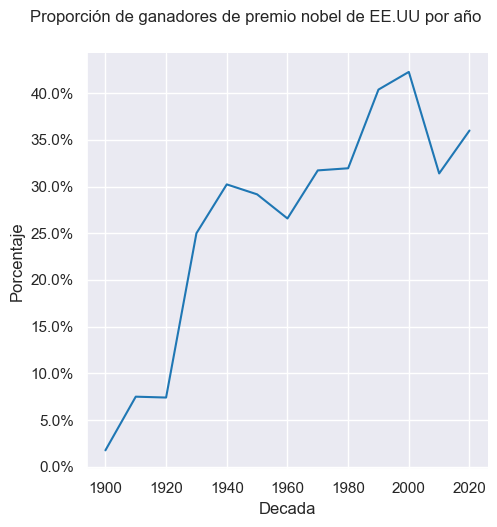

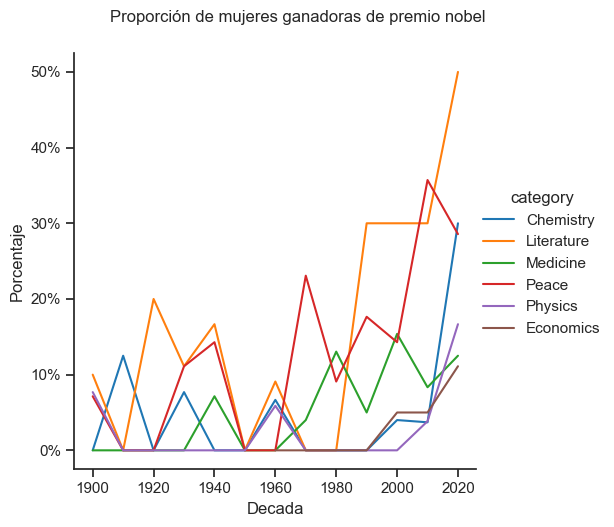

In [ ]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os

# Start coding here!

# Obtener ruta base del archivo
base_path = os.getcwd()
ruta_archivo = os.path.join(base_path, "..", "..", "Archivos", "nobel.csv")
ruta_archivo = os.path.normpath(ruta_archivo)

# 1.Leer los datos de nobel.cvs y convertirlo a dataframe 
df = pd.read_csv(ruta_archivo)

#------------------------------------------------------------
# 2. Encontrar el sexo y país de nacimiento más comúnmente premiados

# Conteo 
country = df['birth_country'].value_counts().head(10)    # Contando por los 10 primeros paises
sex = df['sex'].value_counts()                           # Contando por sexo 

# Almacendo la variable mas comun
top_country = country.index[0]         # El país más común
top_gender  = sex.index[0]             # El genero mas comun

print(f'\nEl país más común es: {top_country}\nEl país de nacimiento más común es: {top_gender}')


# #-----------------------------------------------------------------------
# 3. Decada con más proporción de nacidos en EEUU

# Creando columna de Ganadores nacidos en EEUU
df['Ganadores_EEUU'] = df['birth_country'] == 'United States of America'

# Creando columna de Decadas
df['decadas'] = (df['year'] // 10) * 10

# Calculando la proporción por decada
proporcionGanadoresEEUU = df.groupby(['decadas'], as_index=False)['Ganadores_EEUU'].mean()

# Encontrando la decada con mayor proporción
decada_max_filter = proporcionGanadoresEEUU['Ganadores_EEUU'].max()
decada_maxima = proporcionGanadoresEEUU.query('Ganadores_EEUU == @decada_max_filter')
max_decade_usa = decada_maxima['decadas'].values[0]

print(f'\nDécada con mayor proporción de ganadores de EE.UU: {max_decade_usa}')

#---------------------------------------------------------------------------------
# 4. Crear diagrama de líneas para graficar la proporcion de ganadores de premio nobel en EEUU


# Estilo del background
sns.set_style("darkgrid")

# Establece la escala del contexto (elementos del grafico y labels)
sns.set_context("notebook")

g = sns.relplot(
                kind='line', 
                data=proporcionGanadoresEEUU, 
                x='decadas', 
                y= 'Ganadores_EEUU', 
    
)

# Formatear el eje Y como porcentaje
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    
g.figure.suptitle('Proporción de ganadores de premio nobel de EE.UU por año', y=1.05, fontsize=12)
g.set( xlabel='Decada', ylabel='Porcentaje')

#-------------------------------------------------------------------------------------------
# 5. Decada y Categoria con mayor proporcion de mujeres ganadoras

# Creando columna de mujeres ganadoras de nobel
df['mujeres_ganadoras'] = df['sex'] == 'Female'


# Creando Dataframe con las medias de mujeres ganadoras de premios nobel por decadas y categoria
female_winner = df.groupby(['decadas', 'category'], as_index = False)['mujeres_ganadoras'].mean()


# Buscando el valor maximo para posteriormente poder filtrar el dataframe female_winner
female_winner_filter = female_winner['mujeres_ganadoras'].max()


# Filtrando para encontrar la decada y la categoria con la media mas alta
female_winner_max_category = female_winner[female_winner['mujeres_ganadoras'] == female_winner_filter][['decadas', 'category']]


#Creando un diccionario con la decada y categoria con mayor proporcion de ganadoras
max_female_dict = {
    female_winner_max_category["decadas"].values[0] :  female_winner_max_category["category"].values[0]
}




# Imprimir 

decade = list(max_female_dict.keys())[0]
category = list(max_female_dict.values())[0]


print(f'''\nDecada y Categoria con mayor proporcion de mujeres ganadoras:
           Decada: { decade }
           Categoria: { category }
      ''')

#-----------------------------------------------------------------------------------------
# 6. Crear diagrama de líneas para graficar la proporcion de mujeres ganadoras de premio nobel


# Estilo del background
sns.set_style("ticks")

# Establece la escala del contexto (elementos del grafico y labels)
sns.set_context("notebook")

g = sns.relplot(
                kind = 'line', 
                data = female_winner, 
                x = 'decadas', 
                y = 'mujeres_ganadoras', 
                hue =  'category'
    
)

# Formatear el eje Y como porcentaje
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    
g.figure.suptitle('Proporción de mujeres ganadoras de premio nobel', y=1.05, fontsize=12)
g.set( xlabel='Decada', ylabel='Porcentaje')



#-----------------------------------------------------------------------------------------
# 7. Buscando a la primera mujer en ganar un premio nobel

#Creando Dataframe de mujeres ganadoras
mujeres =  df[ df['mujeres_ganadoras'] == True ]

# Obteniendo la primer mujer ganadora de premio nobel
year_filter = mujeres['year'].min()
first_woman_name     = mujeres[ mujeres['year'] == year_filter ]['full_name'].values[0]
first_woman_category = mujeres[ mujeres['year'] == year_filter ]['category'].values[0]


print(f'''\nLa primera mujer en ganar un premio Nobel es:
        Nombre: {first_woman_name}
        Categoria: {first_woman_category}''')

#---------------------------------------------------------------------------
# 8. Buscando las organizaciones u personas que mas han ganado premio Nobel

# Se crea un Dataframe con el nombre y la cantidad de Nobel que han ganado
premiosNobel =  df['full_name'].value_counts().reset_index() 
premiosNobel.columns = ['Nombre', 'Cantidad']

# Se filtra los maximos ganadores y se obtiene su nombre
maximosGanadoresNobel = premiosNobel[premiosNobel['Cantidad'] >= 2]['Nombre']

# Se crea una lista con los maximos ganadores
repeat_list = list(maximosGanadoresNobel)

#Imprime
print('\nLista de maximos ganadores de premio Nobel:')
for i in repeat_list:
    print(i)